<a href="https://colab.research.google.com/github/MikeDeecode/Bank-customer-churn-predictiom/blob/master/customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**USING LOGISTIC REGRESSION TO PREDICT IF A BANK CUSTOMER WILL EXIT OR NOT**

In [5]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

print("Setup Complete")

Setup Complete


Import the dataset 

In [6]:
customers = pd.read_csv("/content/Bank customers.csv")

print("upload successful")

upload successful


In [7]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
customers['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
customers['Geography'] = customers['Geography'].map({'France':0, 'Spain':1, 'Germany':2})
customers['Gender'] = customers['Gender'].map({'Male':0, 'Female':1})

In [10]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


##Data Preprocessing 

First I will select my features 

In [11]:
x = np.asarray(customers[['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                          'EstimatedSalary']])
x[0:5]

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05],
       [6.0800000e+02, 1.0000000e+00, 4.1000000e+01, 1.0000000e+00,
        8.3807860e+04, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, 8.0000000e+00,
        1.5966080e+05, 3.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.1393157e+05],
       [6.9900000e+02, 0.0000000e+00, 3.9000000e+01, 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.3826630e+04],
       [8.5000000e+02, 1.0000000e+00, 4.3000000e+01, 2.0000000e+00,
        1.2551082e+05, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        7.9084100e+04]])

In [13]:
y = np.asarray(customers['Exited'])
y[0:5]

array([1, 0, 1, 0, 0])

Then we normalise the data

In [16]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

X[0:5]

array([[-0.32622142, -0.9025865 ,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649],
       [-0.44003595,  0.301665  ,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375],
       [-1.53679418, -0.9025865 ,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 ],
       [ 0.50152063, -0.9025865 ,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792],
       [ 2.06388377,  0.301665  ,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578]])

##Tran and Test Sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [19]:
X_train.shape

(8000, 9)

In [20]:
X_test.shape

(2000, 9)

##Modeling - Logistic Regression with Scikitlearn

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01, solver = 'liblinear')
model.fit(X_train, y_train)
model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##Predictions

In [24]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

##Probability of Predictions

In [25]:
prob = model.predict_proba(X_test)
prob

array([[0.80704438, 0.19295562],
       [0.7593952 , 0.2406048 ],
       [0.8511893 , 0.1488107 ],
       ...,
       [0.74805396, 0.25194604],
       [0.69736737, 0.30263263],
       [0.88661288, 0.11338712]])

##Model Evaluation

**Jaccard Index**

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predictions)

0.8165

* The similarity of my predictions the actual values is 0.82 which can also be interpreted as *2 percent similarity 

**Confusion Matrix**

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels = [1, 0])

array([[  68,  328],
       [  39, 1565]])

Lets visualise the confusion matrix to see the distribution of my predictions 

In [53]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):# this function plots the confusion matrix
  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")# this code normalises the values 
  else:
        print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

In [54]:
con_matrix = confusion_matrix(y_test, predictions, labels = [1, 0])
np.set_printoptions(precision = 2)

Confusion matrix, without normalization
[[  68  328]
 [  39 1565]]


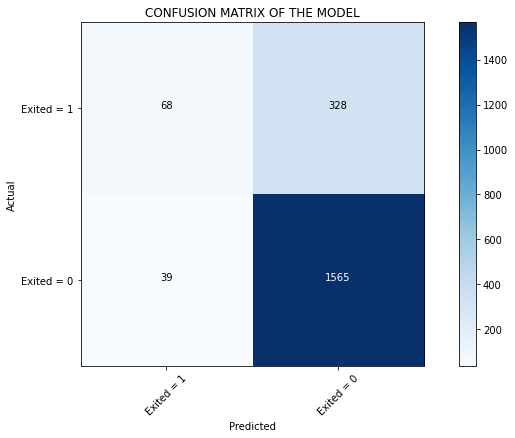

In [55]:
plt.figure(figsize = (10, 6))
plot_confusion_matrix(con_matrix, classes = ['Exited = 1', 'Exited = 0'], normalize = False,
                      title = 'CONFUSION MATRIX OF THE MODEL')
plt.show()

**Classification Report**

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1604
           1       0.64      0.17      0.27       396

    accuracy                           0.82      2000
   macro avg       0.73      0.57      0.58      2000
weighted avg       0.79      0.82      0.77      2000



Here we can see the number of true responses for 0  and 1 under the support column 